## 3.5 データ可視化 演習問題解答例

### 共通処理

In [1]:
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

In [2]:
# ライブラリのimport

# NumPy用ライブラリ
import numpy as np

# Matplotlib中のpyplotライブラリのインポート
import matplotlib.pyplot as plt

# matplotlib日本語化対応ライブラリのインポート
import japanize_matplotlib

# pandas用ライブラリ
import pandas as pd

# データフレーム表示用関数
from IPython.display import display

# seaborn
import seaborn as sns

In [3]:
# 表示オプション調整

# NumPy表示形式の設定
np.set_printoptions(
    suppress=True, precision=4, floatmode='fixed'
)

# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14

# サイズ設定
plt.rcParams['figure.figsize'] = (6, 6)

# 方眼表示ON
plt.rcParams['axes.grid'] = True


# データフレームでの表示精度
pd.options.display.float_format = '{:.4f}'.format

# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

### CSVファイルの読み込み

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/bridges/bridges.data.version1'
cols_jp = [
    'ID', '川コード', '位置', '竣工年', '目的', '長さ', '車線数', '垂直クリアランス',
    '道路位置', '建築資材', '長さ区分', '相対長', '橋種別'
]

# データ読み込み
df = pd.read_csv(
    url, header=None,
    names=colｓ_jp, na_values='?',
    index_col='ID')

display(df.head())


,川コード,位置,竣工年,目的,長さ,車線数,垂直クリアランス,道路位置,建築資材,長さ区分,相対長,橋種別
ID,,,,,,,,,,,,
E1,M,3.0000,1818,HIGHWAY,NaN,2.0000,N,THROUGH,WOOD,SHORT,S,WOOD
E2,A,25.0000,1819,HIGHWAY,1037.0000,2.0000,N,THROUGH,WOOD,SHORT,S,WOOD
E3,A,39.0000,1829,AQUEDUCT,NaN,1.0000,N,THROUGH,WOOD,NaN,S,WOOD
E5,A,29.0000,1837,HIGHWAY,1000.0000,2.0000,N,THROUGH,WOOD,SHORT,S,WOOD
E6,M,23.0000,1838,HIGHWAY,NaN,2.0000,N,THROUGH,WOOD,NaN,S,WOOD


### 演習問題

(1) 実習で使ったデータフレームdfを対象に、「目的」と「橋種別」を軸とする出現頻度のクロス集計表を作り、結果を display関数で表示して下さい。

(2) (1)で作ったクロス集計表をヒートマップ表示して下さい。

In [5]:
# (1) 「目的」と「橋種別」を軸とする出現頻度のクロス集計表
# 参照: 3.4.6節　コード3-4-13

pv = pd.crosstab(
    index=df['目的'], columns=df['橋種別'])
display(pv)

橋種別,ARCH,CANTILEV,CONT-T,NIL,SIMPLE-T,SUSPEN,WOOD
目的,,,,,,,
AQUEDUCT,0,0,0,0,0,1,3
HIGHWAY,13,9,9,0,18,9,11
RR,0,2,1,1,26,0,2
WALK,0,0,0,0,0,1,0


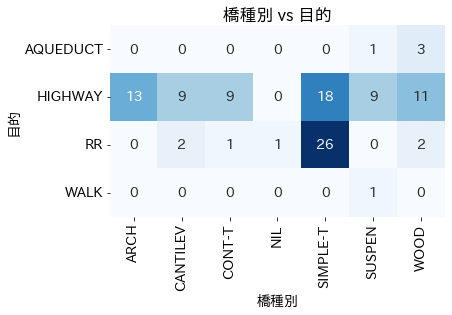

In [6]:
# (2) (1)で作ったクロス集計表のヒートマップ表示
# 参照: 3.5.6節　コード3.5.11

plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(
    pv,square=True,annot=True,
    fmt='d',cmap='Blues', cbar=False)
xlabel = pv.columns.name
ylabel = pv.index.name
plt.title(xlabel+ ' vs '+ylabel)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()